## **5-1 신경망 학습 (4/1)**

## 1. 손실 함수(Loss Function)
- 평균 제곱 오차(MSE)

In [4]:
import numpy as np

In [6]:
def mse(y,t):
    return 0.5*np.sum((y-t)**2)

In [8]:
t = np.array([2,2,2,2,2])
y = np.array([1,2,3,4,5])
print(mse(y,t))

7.5


In [10]:
# print(y-t)
# print((y-t)**2)
# print(np.sum((y-t)**2)

- 교차 엔트로피 오차(Cross Entropy Error,CEE)

In [12]:
def cee(y,t):
    delta = 10**(-7)
    return -np.sum(t*np.log(y+delta)) # delta와 같은 아주작은 값을 넣어줘서 log 0 -> 무한대 되는걸 방지해준다.

In [14]:
t = np.array([0, 0, 1, 0, 0, 0, 0])
y = np.array([1, 0, 0, 0, 0, 0, 0])

print(cee(y,t)) # mse가 0과 가까워질 수록 좋음

16.11809565095832


In [16]:
y = np.array([0.1, 0.1, 0.7, 0.05, 0.05, 0, 0])
print(cee(y,t))

0.3566748010815999


## 2. 수치 미분 계산

In [18]:
import matplotlib.pyplot as plt
def numerical_diff(f,x):
    h = 10**(-4)
    return(f(x+h)-f(x-h))/(2*h)

In [19]:
def func_1(x):
    return x**2 -2*x +1

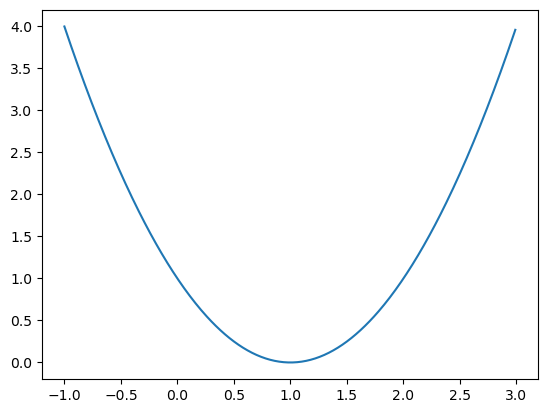

In [20]:
x = np.arange(-1,3,0.01)
y = func_1(x)
plt.plot(x,y)
plt.show()

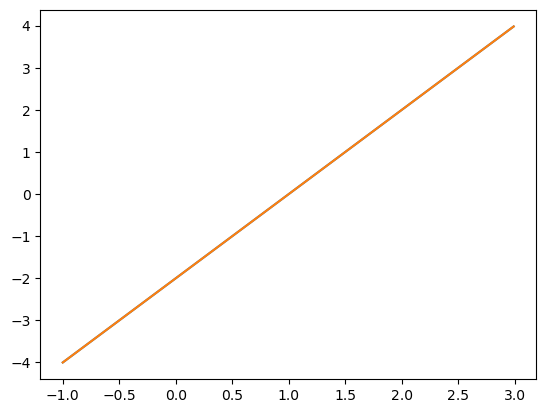

In [24]:
y_num = numerical_diff(func_1, x) # 수치 미분값 y = x**2 - 2*x + 1
y_anal = 2*x-2 #실제 미분깂 y' = 2*x - 2
plt.plot(x,y_num)
plt.plot(x,y_anal)
plt.show()

In [26]:
def numerical_gradient(f,x):
    h = 10**(-4)
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성

    for idx in range(x.size):
        tmp = x[idx]
        x[idx] = tmp+h
        fxh1= f(x)

        x[idx] = tmp-h
        fxh2= f(x)

        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx]= tmp
    return grad